In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [2]:
os.path.abspath(os.getcwd())

'c:\\Users\\simra\\OneDrive\\Desktop\\code\\Data Science\\ds\\images\\model'

In [3]:
img = cv2.imread('./data/angry/angry_065.jpg')
img.shape


(600, 900, 3)

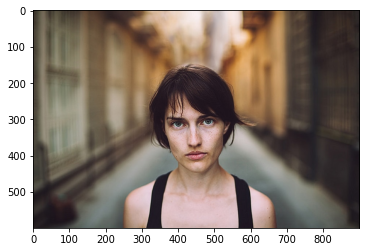

In [4]:
#gray = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(gray)

In [5]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
face_xml_path = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
eye_xml_path = os.path.join(cv2_base_dir,'data/haarcascade_eye.xml')
face_model = cv2.CascadeClassifier(face_xml_path)
eye_model = cv2.CascadeClassifier(eye_xml_path)



In [6]:
faces = face_model.detectMultiScale(img,1.3,5)
faces

array([[333, 230, 216, 216]])

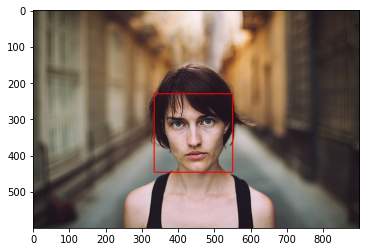

In [7]:
x,y,w,h = faces[0]
roi = cv2.rectangle(gray, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(roi)

In [8]:
eyes = eye_model.detectMultiScale(gray,1.3,5)
eyes

array([[449, 284,  49,  49],
       [373, 290,  49,  49]])

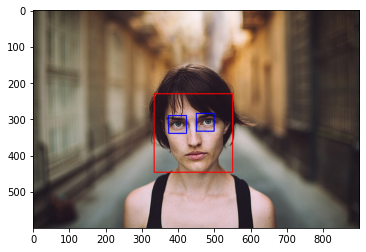

In [9]:
for eye in eyes:
    ex,ey,ew,eh = eye
    final_image = cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,0,255),2) 
plt.imshow(final_image)

In [10]:
label = ['angry','crying','sad','smile']
baseDir = os.path.join(os.path.abspath(os.getcwd()),'data')
print(baseDir)
#os.listdir(os.path.join(baseDir,label[0]))


c:\Users\simra\OneDrive\Desktop\code\Data Science\ds\images\model\data


In [11]:
def convert(path):
        img = cv2.imread(path,0)
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        return gray

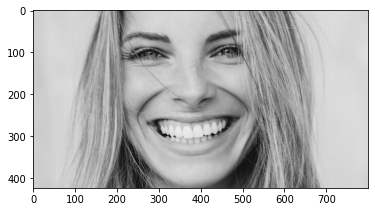

In [12]:
for i in label:
    for img in os.listdir(os.path.join(baseDir,i)):
        path = os.path.join(os.path.join(baseDir,i),img)
        img = convert(path)
        plt.imshow(img)
        break
         

In [13]:
baseDir = os.path.abspath(os.getcwd())
os.listdir(os.path.join(baseDir,'data'))

['angry', 'crying', 'sad', 'smile']

In [14]:
import cv2
import numpy as np
import os 
import pywt
class wavelet:
    def __init__(self,baseDir) -> None:
        self.baseDir = baseDir
        self.X = []
        self.Y = []

    def __pathfile(self):
        for label in os.listdir(os.path.join(self.baseDir,'processed')):
            for imgName in os.listdir(os.path.join(self.baseDir,'processed',label)):
                imgPath = os.path.join(self.baseDir,"processed",label,imgName)
                yield imgPath           

    def w2d(self,img, mode='haar', level=1):
        imArray = img
        #Datatype conversions
        #convert to grayscale
        imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
        #convert to float
        imArray =  np.float32(imArray)   
        imArray /= 255
        # compute coefficients 
        coeffs=pywt.wavedec2(imArray, mode, level=level)

        #Process Coefficients
        coeffs_H=list(coeffs)  
        coeffs_H[0] *= 0;  

        # reconstruction
        imArray_H=pywt.waverec2(coeffs_H, mode);
        imArray_H *= 255
        imArray_H =  np.uint8(imArray_H)

        return imArray_H
    
    def wavelet(self):
        for path in self.__pathfile():
            #print(path)
            img = cv2.imread(path)
            wave = self.w2d(img,'db1',5)
            img_rs = cv2.resize(img,(32,32))
            wave_rs = cv2.resize(wave,(32,32))
            combined_img = np.vstack((img_rs.reshape(32*32*3,1),wave_rs.reshape(32*32,1)))
            self.X.append(combined_img)
            self.Y.append(os.path.basename(path).split('_')[0])

wav = wavelet(os.path.abspath(os.getcwd()))

wav.wavelet()
print(len(wav.X))
print(len(wav.Y))

115
115


In [15]:
print(wav.X[0]) 

[[188]
 [191]
 [195]
 ...
 [229]
 [  2]
 [  0]]


In [16]:
print(wav.Y)

['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile', 'smile']


In [17]:
wav.X[2]

array([[255],
       [255],
       [255],
       ...,
       [135],
       [  1],
       [  2]], dtype=uint8)

In [18]:
X = np.array(wav.X).reshape(len(wav.X),4096).astype(float)
X.shape

(115, 4096)

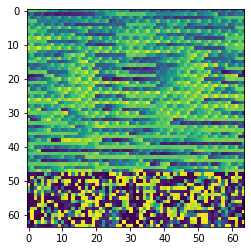

In [19]:
plt.imshow(X[0].reshape(64,64))